<h1>Linear Regression</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('student_notes.csv')


In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


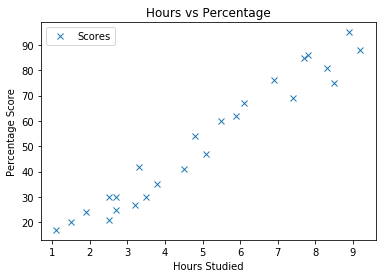

In [7]:
dataset.plot(x='Hours', y='Scores', style='x') 
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show() 

In [8]:
X =  dataset.iloc[0:len(dataset),0]
Y =  dataset.iloc[0:len(dataset),1]

In [9]:
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

<h2> cost function </h2>

In [10]:
def calcule_cost_function(theta_0, theta_1):
    global_cost  = 0
    for i in range(len(X)):
        cost_i = ((theta_0 + (theta_1 * X[i])) - Y[i]) * ((theta_0 + (theta_1 * X[i])) - Y[i]) 
        global_cost+= cost_i
    return (1/ (2 * len(X))) * global_cost

<h2>Les dérivées partielles</h2>

In [11]:
M = len(X) #lent of training dataset 
 
def calculer_derivees_partielles(_theta_0, _theta_1):
    derivee_theta_0 = float(0)
    derivee_theta_1 = float(0)
    for i in range(0, len(X)):
        derivee_theta_0 += float(((_theta_0 + (_theta_1 * X[i])) - float(Y[i])))
        derivee_theta_1 += (((_theta_0 + (_theta_1 * X[i]))) - float(Y[i])) * float(X[i])  
    derivee_theta_0 = (1/M) * derivee_theta_0
    derivee_theta_1 = (1/M) * derivee_theta_1
    return [derivee_theta_0, derivee_theta_1]

<h3>update of _theta_0 and _theta_1</h3>

In [12]:
COST_RECORDER = []# accumuler les erreurs

def calcule_new_theta(_theta_0, _theta_1):
    [derivee_theta_0, derivee_theta_1] = calculer_derivees_partielles(_theta_0,_theta_1)
    new_theta_0 = _theta_0 - (learning_rate_ALPHA * derivee_theta_0)
    new_theta_1 = _theta_1 - (learning_rate_ALPHA * derivee_theta_1)
    COST_RECORDER.append(calcule_cost_function(new_theta_0, new_theta_1))
    return [new_theta_0,new_theta_1]

<h2>apprentissage....</h2>

In [13]:
learning_rate_ALPHA = float(0.0001)
initial_theta_0 = float(0)
initial_theta_1 = float(0)
nombre_iterations = 2000
 
def start_gradient_descent():
    tmp_theta_0 = initial_theta_0
    tmp_theta_1 = initial_theta_1   
    for i in range(nombre_iterations):
        [new_theta_0, new_theta_1] = calcule_new_theta(tmp_theta_0, tmp_theta_1)
        tmp_theta_0 = new_theta_0
        tmp_theta_1 = new_theta_1
    return [tmp_theta_0, tmp_theta_1]         
 
[final_theta_0, final_theta_1] = start_gradient_descent()
 
print ("After {0} iterations theta_0 = {1}, theta_1 = {2}". format(nombre_iterations, final_theta_0, final_theta_1))


After 2000 iterations theta_0 = 1.6314437624926292, theta_1 = 9.896798076251098


<h3>cost function vizualisation</h3>

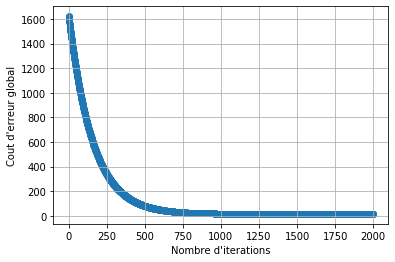

In [14]:
xx = []; yy=[]
for i in range(len(COST_RECORDER)):
   xx.append(i)
   yy.append(COST_RECORDER[i])

axes = plt.axes()
axes.grid()
plt.xlabel('Nombre d\'iterations')
plt.ylabel('Cout d\'erreur global')
plt.scatter(xx,yy)
plt.show()

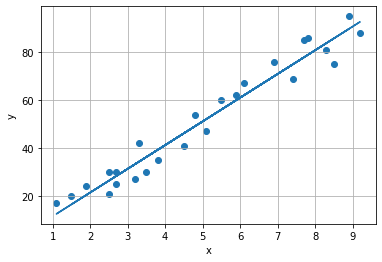

In [15]:
axes = plt.axes()
axes.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y)

plt.plot(X,final_theta_0 + X* final_theta_1)
plt.show()

<h1> with sklearn</h1>

In [16]:
X1 = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values 

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0) 

In [18]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(regressor.intercept_) 

2.018160041434683


In [20]:
print(regressor.coef_) 

[9.91065648]


In [21]:
y_pred = regressor.predict(X_test) 

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


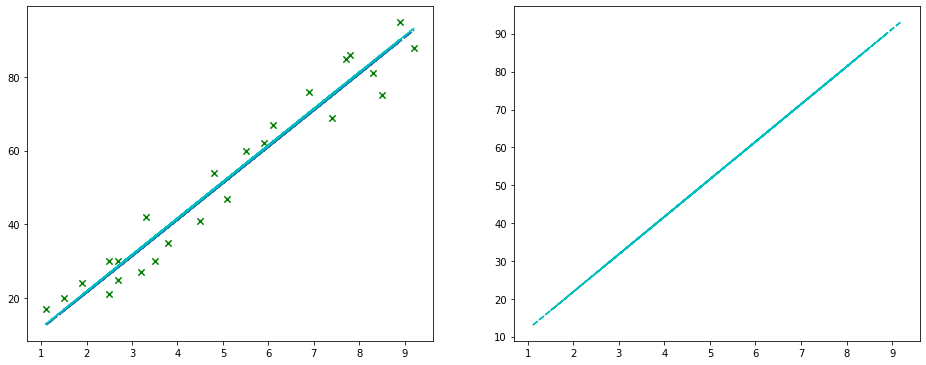

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6.15))
ax[0].scatter(X, y, marker='x', s=40, color='g')


ax[0].plot(X,final_theta_0 + X* final_theta_1,linestyle='dashdot')

ax[1].plot(X,regressor.intercept_ + X* regressor.coef_,'--c')
ax[0].plot(X,regressor.intercept_ + X* regressor.coef_,'--c')
plt.show()